# Introduction to the Symbolic Computation with SymPy

## 1. Preliminaries

* In this tutorial, we assume a basic knowledge in Python, especially in handling objects.
* A proper background in mathematics, especially in linear algebra.
* The main goal of this tutorial, is give you knowledge about how to use some tools included in SymPy, for you to know some useful symbolic tools to start with.
* This tutorial is introductory, there are many specific functionalites that aren't explained here, though are available in the Sympy documentation in its official page -> docs.sympy.org

## 2. Introduction

### 2.1. What is Symbolic Computation?

Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form.

Let’s take an example. Say we wanted to use the built-in Python functions to compute square roots. We might do something like this.

In [2]:
import math
math.sqrt(9)

3.0

9 is a perfect square, so we got the exact answer, 3. But suppose we computed the square root of a number that isn’t a perfect square

In [4]:
math.sqrt(8)

2.8284271247461903

Here we got an approximate result. $ 2.82842712475 $ is not the exact square root of 8 (indeed, the actual square root of 8 cannot be represented by a finite decimal, since it is an irrational number). If all we cared about was the decimal form of the square root of 8, we would be done.

But suppose we want to go further. Recall that $ \sqrt{8} = \sqrt{4 \cdot 2} = 2 \sqrt{2} $. We would have a hard time deducing this from the above result. This is where symbolic computation comes in. With a symbolic computation system like SymPy, square roots of numbers that are not perfect squares are left unevaluated by default

In [4]:
from sympy import *
print sympy.sqrt(3)

SyntaxError: invalid syntax (<ipython-input-4-42ec07d779fd>, line 2)

Furthermore—and this is where we start to see the real power of symbolic computation—symbolic results can be symbolically simplified.

In [1]:
print sympy.sqrt(8)

SyntaxError: invalid syntax (<ipython-input-1-adb99578df24>, line 1)

### 2.2. A More Interesting Example

The above example starts to show how we can manipulate irrational numbers exactly using SymPy. But it is much more powerful than that. Symbolic computation systems (which by the way, are also often called computer algebra systems, or just CASs) such as SymPy are capable of computing symbolic expressions with variables.

As we will see later, in SymPy, variables are defined using $ symbols $. Unlike many symbolic manipulation systems, variables in SymPy must be defined before they are used (the reason for this will be discussed in the next section).

Let us define a symbolic expression, representing the mathematical expression $ x + 2y $.

In [2]:
from sympy import symbols
x, y = symbols("x y")
expr = x + 2*y
print expr

x + 2*y


Note that we wrote $ x + 2*y $ just as we would if $ x $ and $ y $ were ordinary Python variables. But in this case, instead of evaluating to something, the expression remains as just $ x + 2*y $. Now let us play around with it:

In [5]:
print expr + 1
print expr - x

x + 2*y + 1
2*y


Notice something in the above example. When we typed $ expr - x $, we did not get $ x + 2*y - x $, but rather just $ 2*y $. The $ x $ and the $ -x $ automatically canceled one another. This is similar to how $ sqrt(8) $ automatically turned into $ 2*sqrt(2) $ above. This isn’t always the case in SymPy, however:

In [96]:
print x*expr

x*(x + 2*y)


Here, we might have expected $ x(x+2y) $ to transform into $ x^2+2xy $, but instead we see that the expression was left alone. This is a common theme in SymPy. Aside from obvious simplifications like $ x−x=0 $ and $ \sqrt{8} = 2 \sqrt{2} $, most simplifications are not performed automatically. This is because we might prefer the factored form $ x(x+2y) $, or we might prefer the expanded form $ x^2+2xy $. Both forms are useful in different circumstances. In SymPy, there are functions to go from one form to the other

In [97]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
print expanded_expr
print factor(expanded_expr)

x**2 + 2*x*y
x*(x + 2*y)


### 2.3. The Power of Symbolic Computation

The real power of a symbolic computation system such as SymPy is the ability to do all sorts of computations symbolically. SymPy can simplify expressions, compute derivatives, integrals, and limits, solve equations, work with matrices, and much, much more, and do it all symbolically. It includes modules for plotting, printing (like 2D pretty printed output of math formulas, or $ \LaTeX $), code generation, physics, statistics, combinatorics, number theory, geometry, logic, and more. Here is a small sampling of the sort of symbolic power SymPy is capable of, to whet your appetite.

In [98]:
from sympy import *
x, t, z, nu = symbols("x t z nu")

This will make all further examples pretty print with unicode characters.

In [48]:
init_printing(use_unicode=True)

Take the derivative of $ \sin(x) e^{x}$.

In [100]:
diff(sin(x)*exp(x),x)

Compute $ \int(e^x sin(x) + e^x cos(x)) dx $

In [101]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

Compute $ \int_{-\inf}^{\inf} sin(x^2)dx $

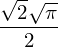

In [102]:
integrate(sin(x**2), (x, -oo,oo))

Find $ \lim_{x->0} \frac{sin(x)}{x} $

In [103]:
limit(sin(x)/x,x,0)

Solve $ x^2 - 2 = 0 $

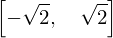

In [104]:
solve(x**2 - 2, x)

Solve the differential equation $ y'' - y = e^t $

In [10]:
from sympy import *
y = Function('y')
t = symbols('t')
dsolve(Eq(y(t).diff(t,t) - y(t), exp(t)), y(t))

y(t) == C2*exp(-t) + (C1 + t/2)*exp(t)

Find the eigenvalues of
$
\begin{bmatrix}
    1 & 2 \\
    2 & 2
\end{bmatrix}
$


In [14]:
Matrix([[1, 2], [2, 2]]).eigenvals()
help(Matrix)

Help on class MutableDenseMatrix in module sympy.matrices.dense:

class MutableDenseMatrix(DenseMatrix, sympy.matrices.matrices.MatrixBase)
 |  Method resolution order:
 |      MutableDenseMatrix
 |      DenseMatrix
 |      sympy.matrices.matrices.MatrixBase
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __setitem__(self, key, value)
 |      Examples
 |      ========
 |      
 |      >>> from sympy import Matrix, I, zeros, ones
 |      >>> m = Matrix(((1, 2+I), (3, 4)))
 |      >>> m
 |      Matrix([
 |      [1, 2 + I],
 |      [3,     4]])
 |      >>> m[1, 0] = 9
 |      >>> m
 |      Matrix([
 |      [1, 2 + I],
 |      [9,     4]])
 |      >>> m[1, 0] = [[0, 1]]
 |      
 |      To replace row r you assign to position r*m where m
 |      is the number of columns:
 |      
 |      >>> M = zeros(4)
 |      >>> m = M.cols
 |      >>> M[3*m] = ones(1, m)*2; M
 |      Matrix([
 |      [0, 0, 0, 0],
 |      [0, 0, 0, 0],
 |      [0, 0, 0, 0],
 |      [2, 2, 2, 2]])
 | 

Rewrite the Bessel function $ J_v (z) $ in terms of the spherical Bessel function $ j_v (z) $.

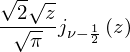

In [107]:
besselj(nu, z).rewrite(jn)

Print $ \int_0^\pi cos^2(x)dx $ using $ \LaTeX $.

In [108]:
print latex(Integral(cos(x)**2, (x,0,pi)))

\int_{0}^{\pi} \cos^{2}{\left (x \right )}\, dx


### 2.4. Why SymPy?

There are many computer algebra systems out there.What makes SymPy a better choice than the alternatives?

First off, SymPy is completely free. It is open source, and licensed under the liberal BSD license, so you can modify the source code and even sell it if you want to. This contrasts with popular commercial systems like Maple or Mathematica that cost hundreds of dollars in licenses.

Second, SymPy uses Python. Most computer algebra systems invent their own language. Not SymPy. SymPy is written entirely in Python, and is executed entirely in Python. This means that if you already know Python, it is much easier to get started with SymPy, because you already know the syntax (and if you don’t know Python, it is really easy to learn). We already know that Python is a well-designed, battle-tested language. The SymPy developers are confident in their abilities in writing mathematical software, but programming language design is a completely different thing. By reusing an existing language, we are able to focus on those things that matter: the mathematics.

Another computer algebra system, Sage also uses Python as its language. But Sage is large, with a download of over a gigabyte. An advantage of SymPy is that it is lightweight. In addition to being relatively small, it has no dependencies other than Python, so it can be used almost anywhere easily. Furthermore, the goals of Sage and the goals of SymPy are different. Sage aims to be a full featured system for mathematics, and aims to do so by compiling all the major open source mathematical systems together into one. When you call some function in Sage, such as integrate, it calls out to one of the open source packages that it includes. In fact, SymPy is included in Sage. SymPy on the other hand aims to be an independent system, with all the features implemented in SymPy itself.

A final important feature of SymPy is that it can be used as a library. Many computer algebra systems focus on being usable in interactive environments, but if you wish to automate or extend them, it is difficult to do. With SymPy, you can just as easily use it in an interactive Python environment or import it in your own Python application. SymPy also provides APIs to make it easy to extend it with your own custom functions.

## 3. Gotchas

To begin, we should make something about SymPy clear. SymPy is nothing more than a Python library, like $ NumPy $, $ Django $, or even modules in the Python standard library $ sys $ or $ re $. What this means is that SymPy does not add anything to the Python language. Limitations that are inherent in the Python language are also inherent in SymPy. It also means that SymPy tries to use Python idioms whenever possible, making programming with SymPy easy for those already familiar with programming with Python. As a simple example, SymPy uses Python syntax to build expressions. Implicit multiplication (like $ 3x $ or $ 3\ x $) is not allowed in Python, and thus not allowed in SymPy. To multiply $ 3 $ and $ x $, you must type $ 3*x $ with the $ * $.

### 3.1 Symbols

One consequence of this fact is that SymPy can be used in any environment where Python is available. We just import it, like we would any other library: 

In [109]:
from sympy import *

This imports all the functions and classes from SymPy into our interactive Python session. Now, suppose we start to do a computation.

In [20]:
# You have to define the x variable first. We already defined it above :D
x + 1

x + 1

$ symbols $ takes a string of variable names separated by spaces or commas, and creates Symbols out of them. We can then assign these to variable names. Later, we will investigate some convenient ways we can work around this issue. For now, let us just define the most common variable names, $ x $, $ y $, and $ z $, for use through the rest of this section

In [111]:
x, y, z = symbols("x y z")

As a final note, we note that the name of a Symbol and the name of the variable it is assigned to need not have anything to do with one another.

In [112]:
a, b = symbols("b a")
print a
print b

b
a


Here we have done the very confusing thing of assigning a Symbol with the name $ a $ to the variable $ b $, and a Symbol of the name $ b $ to the variable $ a $. Now the Python variable named $ a $ points to the SymPy Symbol named $ b $, and visa versa. How confusing. We could have also done something like

In [113]:
crazy = symbols("unrelated")
crazy + 1

This also shows that Symbols can have names longer than one character if we want.

Usually, the best practice is to assign Symbols to Python variables of the same name, although there are exceptions: Symbol names can contain characters that are not allowed in Python variable names, or may just want to avoid typing long names by assigning Symbols with long names to single letter Python variables.

To avoid confusion, throughout this tutorial, Symbol names and Python variable names will always coincide. Furthermore, the word “Symbol” will refer to a SymPy Symbol and the word “variable” will refer to a Python variable.

Finally, let us be sure we understand the difference between SymPy Symbols and Python variables. Consider the following:

In [114]:
x = symbols('x')
expr = x + 1
x = 2

What do you think the output of this code will be? If you thought $ 3 $, you’re wrong. Let’s see what really happens

In [115]:
x = symbols('x')
expr = x + 1
x = 2
print (expr)

x + 1


Changing $ x $ to $ 2 $ had no effect on expr. This is because $ x = 2 $ changes the Python variable $ x $ to $ 2 $, but has no effect on the SymPy Symbol $ x $, which was what we used in creating $ expr $. When we created $ expr $, the Python variable $ x $ was a Symbol. After we created, it, we changed the Python variable $ x $ to $ 2 $. But $ expr $ remains the same. This behavior is not unique to SymPy. All Python programs work this way: if a variable is changed, expressions that were already created with that variable do not change automatically. For example

In [26]:
from sympy import sympify
x = "abc"
expr = x + "def"
print expr
x = "ABC"
print expr
print type(sympify(expr))

abcdef
abcdef
<class 'sympy.core.symbol.Symbol'>


In this example, if we want to know what $ expr $ is with the new value of $ x $, we need to reevaluate the code that created $ expr $, namely, $ expr = x + 1 $. This can be complicated if several lines created $ expr $. One advantage of using a symbolic computation system like SymPy is that we can build a symbolic representation for $ expr $, and then substitute $ x $ with values. The correct way to do this in SymPy is to use $ subs $, which will be discussed in more detail later.

In [37]:
from sympy import sin, symbols
x = symbols('x')
expr = x + 1
expr.subs(x, 2)
y,t,c = symbols('y t c')
expr = sin(x)/x + y*t + c
print expr.subs({t: 0})

c + sin(x)/x


### 3.2. Equals signs

Another very important consequence of the fact that SymPy does not extend Python syntax is that $ = $ does not represent equality in SymPy. Rather it is Python variable assignment. This is hard-coded into the Python language, and SymPy makes no attempts to change that.

You may think, however, that $ == $, which is used for equality testing in Python, is used for SymPy as equality. This is not quite correct either. Let us see what happens when we use $ == $.

In [118]:
x + 1 == 4

False

Instead of treating $ x + 1 == 4 $ symbolically, we just got False. In SymPy, $ == $ represents exact structural equality testing. This means that $ a == b $ means that we are $ asking $ if $ a=b $. We always get a $ bool $ as the result of $ == $. There is a separate object, called $ Eq $, which can be used to create symbolic equalities

In [119]:
Eq(x + 1, 4)

There is one additional caveat about $ == $ as well. Suppose we want to know if $ (x+1)^2=x2+2x+1 $. We might try something like this

In [40]:
(x + 1)**2 == x**2 + 2*x + 1
expra = (x + 1)**2
exprb = x**2 + 2*x + 1
print expra == exprb
print expra.equals(exprb)

False
True


We got False again. However, $ (x+1)^2 $ $ does $ equal $ x^2+2x+1 $. What is going on here? Did we find a bug in SymPy, or is it just not powerful enough to recognize this basic algebraic fact?

Recall from above that $ == $ represents exact structural equality testing. “Exact” here means that two expressions will compare equal with $ == $ only if they are exactly equal structurally. Here, $ (x+1)^2 $ and $ x^2+2x+1 $ are not the same symbolically. One is the power of an addition of two terms, and the other is the addition of three terms.

It turns out that when using SymPy as a library, having $ == $ test for exact symbolic equality is far more useful than having it represent symbolic equality, or having it test for mathematical equality. However, as a new user, you will probably care more about the latter two. We have already seen an alternative to representing equalities symbolically, $ Eq $. To test if two things are equal, it is best to recall the basic fact that if $ a=b $, then $ a−b=0 $. Thus, the best way to check if $ a=b $ is to take $ a−b $ and simplify it, and see if it goes to 0. We will learn later that the function to do this is called simplify. This method is not infallible—in fact, it can be theoretically proven that it is impossible to determine if two symbolic expressions are identically equal in general—but for most common expressions, it works quite well.

In [41]:
a = (x + 1)**2
b = x**2 + 2*x + 1
print a-b
print simplify(a - b)
c = x**2 - 2*x + 1
print a-c
print simplify(a - c)

-x**2 - 2*x + (x + 1)**2 - 1
0
-x**2 + 2*x + (x + 1)**2 - 1
4*x


There is also a method called $ equals $ that tests if two expressions are equal by evaluating them numerically at random points.

In [122]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

### 3.3. Two Final Notes: ^ and /

You may have noticed that we have been using $ ** $ for exponentiation instead of the standard ^. That’s because SymPy follows Python’s conventions. In Python, ^ represents logical exclusive or. SymPy follows this convention:

In [42]:
print True ^ False
print True ^ True
print x^y

True
False
Xor(x, y)


Finally, a small technical discussion on how SymPy works is in order. When you type something like $ x + 1 $, the SymPy Symbol $ x $ is added to the Python int $ 1 $. Python’s operator rules then allow SymPy to tell Python that SymPy objects know how to be added to Python ints, and so $ 1 $ is automatically converted to the SymPy Integer object.

This sort of operator magic happens automatically behind the scenes, and you rarely need to even know that it is happening. However, there is one exception. Whenever you combine a SymPy object and a SymPy object, or a SymPy object and a Python object, you get a SymPy object, but whenever you combine two Python objects, SymPy never comes into play, and so you get a Python object.

In [124]:
print type(Integer(1) + 1)
print type(1 + 1)

<class 'sympy.core.numbers.Integer'>
<type 'int'>


This is usually not a big deal. Python ints work much the same as SymPy Integers, but there is one important exception: division. In SymPy, the division of two Integers gives a Rational:

In [125]:
print Integer(1)/Integer(3)
print type(Integer(1)/Integer(3))

1/3
<class 'sympy.core.numbers.Rational'>


But in Python $ / $ represents either integer division or floating point division, depending on whether you are in Python 2 or Python 3, and depending on whether or not you have run $ from __future__ import division $:

In [45]:
from __future__ import division
1/2

<type 'int'>


0.5

To avoid this, we can construct the rational object explicitly

In [47]:
print Rational(1, 2)

1/2


This problem also comes up whenever we have a larger symbolic expression with $ int $/$ int $ in it. For example:

In [128]:
x + 1/2

This happens because Python first evaluates $ 1/2 $ into $ 0.5 $, and then that is cast into a SymPy type when it is added to $ x $. Again, we can get around this by explicitly creating a Rational:

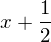

In [49]:
x + Rational(1, 2)

Read the documentation to see more tips about that.

## 4. Basic Operations

Here we discuss some of the most basic operations needed for expression manipulation in SymPy. 

In [130]:
from sympy import *
x, y, z = symbols("x y z")

### 4.1. Substitution

One of the most common things you might want to do with a mathematical expression is substitution. Substitution replaces all instances of something in an expression with something else. It is done using the $ subs $ method. For example

In [131]:
expr = cos(x) + 1
expr.subs(x, y)

Substitution is usually done for one of two reasons:

1 -> Evaluating an expression at a point. For example, if our expression is $ cos(x) + 1 $ and we want to evaluate it at the point $ x = 0 $, so that we get $ cos(0) + 1 $, which is $ 2 $.

In [132]:
expr.subs(x, 0)

2 -> Replacing a subexpression with another subexpression. There are two reasons we might want to do this. The first is if we are trying to build an expression that has some symmetry, such as $ x^{x^{x^x}} $. To build this, we might start with $ x**y $, and replace $ y $ with $ x**y $. We would then get $ x**(x**y) $. If we replaced y in this new expression with  $ x**x $, we would get $ x**(x**(x**x)) $, the desired expression.

In [133]:
expr = x**y
print expr
expr = expr.subs(y, x**y)
print expr
expr = expr.subs(y, x**x)
print expr

x**y
x**(x**y)
x**(x**(x**x))


The second is if we want to perform a very controlled simplification, or perhaps a simplification that SymPy is otherwise unable to do. For example, say we have $ sin(2x)+cos(2x) $, and we want to replace $ sin(2x) $ with $ 2sin(x)cos(x) $. As we will learn later, the function expand_trig does this. However, this function will also expand $ cos(2x) $, which we may not want. While there are ways to perform such precise simplification.

In [134]:
expr = sin(2*x) + cos(2*x)
print expand_trig(expr)
print expr.subs(sin(2*x),2*sin(x)*cos(x))

2*sin(x)*cos(x) + 2*cos(x)**2 - 1
2*sin(x)*cos(x) + cos(2*x)


There are two important things to note about $ subs $. First, it returns a new expression. SymPy objects are immutable. That means that $ subs $ does not modify it in-place. For example

In [135]:
expr = cos(x)
print expr.subs(x, 0)
print expr
print x

1
cos(x)
x


Here, we see that performing $ expr.subs(x, 0) $ leaves expr unchanged. In fact, since SymPy expressions are immutable, no function will change them in-place. All functions will return new expressions.

To perform multiple substitutions at once, pass a list of $ (old, new) $ pairs to $ subs $.

In [136]:
expr = x**3 + 4*x*y - z
print expr.subs([(x,2), (y,4), (z,0)])

40


It is often useful to combine this with a list comprehension to do a large set of similar replacements all at once. For example, say we had $ x^4−4x^3+4x^2−2x+3 $ and we wanted to replace all instances of x that have an even power with y, to get $ y^4−4x^3+4y^2−2x+3 $.

In [137]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
print replacements
expr.subs(replacements)

[(1, 1), (x**2, y**2), (x**4, y**4)]


### 4.2. Converting Strings to SymPy Expressions

The $ sympify $ function (that’s $ sympify $, not to be confused with $ simplify $) can be used to convert strings into SymPy expressions.

For example

In [138]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
print expr
print expr.subs(x, 2)

x**2 + 3*x - 1/2
19/2


Warning: $ simpify $ uses $ eval $. Don't use it on unsanitized input.

### 4.3. evalf

To evaluate a numerical expression into a floating point number, use $ evalf $.

In [51]:
expr = sqrt(8)
print expr
print expr.evalf()

2*sqrt(2)
2.82842712474619


SymPy can evaluate floating point expressions to arbitrary precision. By default, 15 digits of precision are used, but you can pass any number as the argument to $ evalf $. Let’s compute the first $ 100 $ digits of $ \pi $.

In [140]:
pi.evalf(100)

To numerically evaluate an expression with a Symbol at a point, we might use $ subs $ followed by $ evalf $, but it is more efficient and numerically stable to pass the substitution to $ evalf $ using the $ subs $ flag, which takes a dictionary of $ Symbol: point $ pairs.

In [141]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

Sometimes there are roundoff errors smaller than the desired precision that remain after an expression is evaluated. Such numbers can be removed at the user’s discretion by setting the $ chop $ flag to True.

In [142]:
one = cos(1)**2 + sin(1)**2
print (one - 1).evalf()
print (one - 1).evalf(chop=True)

-0.e-124
0


### 4.4. lambdify

$ subs $ and $ evalf $ are good if you want to do simple evaluation, but if you intend to evaluate an expression at many points, there are more efficient ways. For example, if you wanted to evaluate an expression at a thousand points, using SymPy would be far slower than it needs to be, especially if you only care about machine precision. Instead, you should use libraries like NumPy and SciPy.

The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the $ lambdify $ function. $ lambdify $ acts like a $ lambda $ function, except it converts the SymPy names to the names of the given numerical library, usually NumPy. For example

In [59]:
import numpy as np
a = np.arange(10)
expr = sin(x)
f = lambdify(x, expr, "numpy")
print f(a)
g = lambdify(x, expr, "sympy")
print np.vectorize(g)(a)
vect = np.vectorize(g)(a)
eval_f = lambda expr: expr.evalf()
print np.array(map(eval_f, vect))

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
[0 sin(1) sin(2) sin(3) sin(4) sin(5) sin(6) sin(7) sin(8) sin(9)]
[0 0.841470984807897 0.909297426825682 0.141120008059867 -0.756802495307928
 -0.958924274663138 -0.279415498198926 0.656986598718789 0.989358246623382
 0.412118485241757]


You can use other libraries than NumPy. For example, to use the standard library math module, use $ "math" $.

In [144]:
f = lambdify(x, expr, "math")
f(0.1)
#f(a) -> Error
#np.vectorize(f)(a) -> Good

To use lambdify with numerical libraries that it does not know about, pass a dictionary o sympy_name:numerical_function pairs. For example

In [145]:
def mysin(x):
    """
    My sin. Not only accurate for small x.
    """
    return x

f = lambdify(x, expr, {"sin": mysin})
f(0.1)

## 5. Printing

As we have already seen, SymPy can pretty print its output using Unicode characters. This is a short introduction to the most common printing options available in SymPy.

### 5.1. Printers

There are several printers available in SymPy. The most common ones are

* str
* repr
* ASCII pretty printer
* Unicode pretty printer
* LaTeX
* MathML
* Dot

In addition to these, there are also “printers” that can output SymPy objects to code, such as C, Fortran, Javascript, Theano, and Python. These are not discussed in this tutorial.

### 5.2. Setting up Pretty Printing

### 5.3. Printing Functions

In addition to automatic printing, you can explicitly use any one of the printers by calling the appropriate function.

#### str

To get a string form of an expression, use str(expr). This is also the form that is produced by print(expr). String forms are designed to be easy to read, but in a form that is correct Python syntax so that it can be copied and pasted. The str() form of an expression will usually look exactly the same as the expression as you would enter it.

In [146]:
from sympy import *
x, y, z = symbols('x y z')
str(Integral(sqrt(1/x), x))

'Integral(sqrt(1/x), x)'

In [147]:
print str(Integral(sqrt(1/x), x))

Integral(sqrt(1/x), x)


In [148]:
#### repr

The repr form of an expression is designed to show the exact form of an expression. To get it, use $ srepr() $.

In [149]:
srepr(Integral(sqrt(1/x), x))

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

The repr form is mostly useful for understanding how an expression is built internally.

#### ASCII Pretty Printer

The ASCII pretty printer is accessed from $ pprint() $. If the terminal does not support Unicode, the ASCII printer is used by default. Otherwise, you must pass $ use_unicode=False $.

In [150]:
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


$ pprint() $ prints the output to the screen. If you want the string form, use $ pretty() $.

In [151]:
pretty(Integral(sqrt(1/x), x), use_unicode=False)

'  /          \n |           \n |     ___   \n |    / 1    \n |   /  -  dx\n | \\/   x    \n |           \n/            '

In [152]:
print pretty(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


#### Unicode Pretty Printer

The Unicode pretty printer is also accessed from $ pprint() $ and $ pretty() $. It the terminal supports Unicode, it is used automatically. If $ pprint() $ is not able to detect that the terminal supports unicode, you can pass $ use_unicode=True $ to force it to use Unicode.

In [153]:
pprint(Integral(sqrt(1/x), x), use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


#### $ \LaTeX $

To get the $ \LaTeX $ form of an expression, use $ latex() $.

In [154]:
print latex(Integral(sqrt(1/x), x))

\int \sqrt{\frac{1}{x}}\, dx


The $ latex() $ function has many options to change the formatting of different things.

#### MathML

There is also a printer to MathML, called $ print_mathml() $. It must be imported from $ sympy.printing.mathml $.

In [155]:
from sympy.printing.mathml import print_mathml

In [156]:
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



$ print_mathml() $ prints the output. If you want the string, use the function $ mathml() $.

#### Dot

The $ dotprint() $ function in $ sympy.printing.dot $ prints output to dot format, which can be rendered with Graphviz.

## 6. Simplification

See the documentation -> http://docs.sympy.org/dev/tutorial/simplification.html

## 7. Calculus

This section covers how to do basic calculus tasks such as derivatives, integrals, limits, and series expansions in SymPy. If you are not familiar with the math of any part of this section, you may safely skip it.

### 7.1. Derivatives

To take derivatives, use the diff function.

In [157]:
diff(cos(x) ,x)

In [158]:
diff(exp(x**2), x)

$ diff $ can take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number after the variable. For example, both of the following find the third derivative of $ x^4 $.

In [159]:
diff(x**4, x, x, x)

In [160]:
diff(x**4, x, 3)

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same syntax as for single variable derivatives. For example, each of the following will compute $ \frac{\partial^{7}}{\partial x\partial y^{2}\partial z^{4}}  e^{x y z} $

In [161]:
expr = exp(x*y*z)
diff(expr, x, y, y, z, z, z, z)

In [162]:
diff(expr, x, y, 2, z, 4)

In [163]:
diff(expr, x, y, y, z, 4)

$ diff $ can also be called as a method. The two ways of calling $ diff $ are exactly the same, and are provided only for convenience.

In [64]:
expr.diff(x, y, y, z, 4)

NameError: name 'z' is not defined

To create an unevaluated derivative, use the $ Derivative $ class. It has the same syntax as $ diff $.

In [69]:
x, y, z = symbols('x y z')
expr = Function('f')
deriv = Derivative(expr, x, y, y, z, 4)

To evaluate an unevaluated derivative, use the $ doit $ method.

In [166]:
deriv.doit()

These unevaluated objects are useful for delaying the evaluation of the derivative, or for printing purposes.

### 7.2. Integrals

To compute an integral, use the $ integrate $ function. There are two kinds of integrals, definite and indefinite. To compute an indefinite integral, that is, an antiderivative, or primitive, just pass the variable after the expression.

In [167]:
integrate(cos(x), x)

Note that SymPy does not include the constant of integration. If you want it, you can add one yourself, or rephrase your problem as a differential equation and use dsolve to solve it.

To compute a definite integral, pass the argument ($ integration_variable $, $ lower_limit $, $ upper_limit $). For example, to compute

$ \int_{0}^{\infty} e^{- x}\, dx $

we would do

In [168]:
integrate(exp(-x), (x, 0, oo))

As with indefinite integrals, you can pass multiple limit tuples to perform a multiple integral. For example, to compute

$ \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy $

do

In [169]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

If $ integrate $ is unable to compute an integral, it returns an unevaluated $ Integral $ object.

In [170]:
expr = integrate(x**x, x)
print expr

Integral(x**x, x)


As with $ Derivative $, you can create an unevaluated integral using $ Integral $. To later evaluate this integral, call $ doit $.

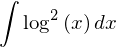

In [72]:
expr = Integral(log(x)**2, x)
expr

In [73]:
expr.doit()

$ integrate $ uses powerful algorithms that are always improving to compute both definite and indefinite integrals, including heuristic pattern matching type algorithms, a partial implementation of the Risch algorithm, and an algorithm using Meijer G-functions that is useful for computing integrals in terms of special functions, especially definite integrals. Here is a sampling of some of the power of $ integrate $.

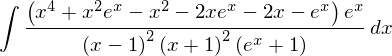

In [173]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
integ

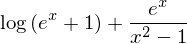

In [174]:
integ.doit()

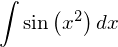

In [175]:
integ = Integral(sin(x**2), x)
integ

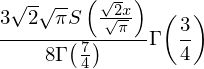

In [176]:
integ.doit()

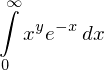

In [177]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

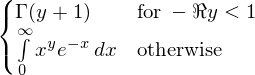

In [178]:
integ.doit()

This last example returned a $ Piecewise $ expression because the integral does not converge unless ℜ(y)>1.

### 7.3. Limits

SymPy can compute symbolic limits with the $ limit $ function. The syntax to compute

$ \lim_{x \to 0^+}\left(\frac{1}{x} \sin{\left (x \right )}\right) $

In [179]:
limit(sin(x)/x, x, 0)

$ limit $ should be used instead of $ subs $ whenever the point of evaluation is a singularity. Even though SymPy has objects to represent $ \infty $, using them for evaluation is not reliable because they do not keep track of things like rate of growth. Also, things like $ \infty - \infty$ and $ \frac{\infty}{\infty} $ return nan (not-a-number). For example

In [180]:
expr = x**2/exp(x)
expr.subs(x, oo)

In [181]:
limit(expr, x, oo)

Like $ Derivative $ and $ Integral $, $ limit $ has an unevaluated counterpart, $ Limit $. To evaluate it, use $ doit $.

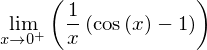

In [182]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [183]:
expr.doit()

To evaluate a limit at one side only, pass '+' or '-' as a third argument to $ limit $. For example, to compute

$ \lim_{x \to 0^+} \frac{1}{x} $

do

In [184]:
limit(1/x, x, 0, '+')

As opposed to

In [185]:
limit(1/x, x, 0, '-')

### 7.4. Series Expansion

SymPy can compute asymptotic series expansions of functions around a point. To compute the expansion of f(x) around the point $ x = x0 $ terms of order xn, use $ f(x).series(x, x0, n) $. $ x0 $ and n can be omitted, in which case the defaults $ x0=0 $ and $ n=6 $ will be used.

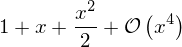

In [186]:
expr = exp(sin(x))
expr.series(x, 0, 4)

The $ \mathcal{O}\left(x^{4}\right) $ term at the end represents the Landau order term at $ x=0 $ (not to be confused with big O notation used in computer science, which generally represents the Landau order term at $ x= \infty $). It means that all x terms with power greater than or equal to $ x^4 $ are omitted. Order terms can be created and manipulated outside of $ series $. They automatically absorb higher order terms.

In [187]:
x + x**3 + x**6 + O(x**4)

If you do not want the order term, use the $ removeO $ method.

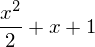

In [188]:
expr.series(x, 0, 4).removeO()

The $ O $ notation supports arbitrary limit points (other than 0):

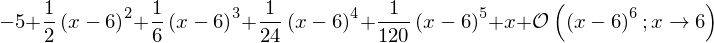

In [193]:
exp(x - 6).series(x, x0=6)

### 7.5. Finite differences

So far we have looked at expressions with analytical derivatives and primitive functions respectively. But what if we want to have an expression to estimate a derivative of a curve for which we lack a closed form representation, or for which we don’t know the functional values for yet. One approach would be to use a finite difference approach.

You can use the $ as\_finite\_diff $ method of on any $ Derivative $ instance to generate approximations to derivatives of arbitrary order:

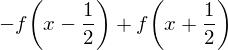

In [205]:
f = Function('f')
dfdx = f(x).diff(x)
as_finite_diff(dfdx)

here the first order derivative was approximated around x using a minimum number of points (2 for 1st order derivative) evaluated equidistantly using a step-size of 1. We can use arbitrary steps (possibly containing symbolic expressions):

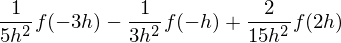

In [200]:
f = Function('f')
d2fdx2 = f(x).diff(x, 2)
h = Symbol('h')
as_finite_diff(d2fdx2, [-3*h, -h, 2*h])

If you are just interested in evaluating the weights, you can do so manually:

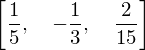

In [203]:
finite_diff_weights(2, [-3, -1, 2], 0)[-1][-1]

note that we only need the last element in the last sublist returned from finite_diff_weights. The reason for this is that finite_diff_weights also generates weights for lower derivatives and using fewer points (see the documentation of $ finite\_diff\_weights $ for more details).

if using $ finite\_diff\_weights $ directly looks complicated and the $ as\_finite\_diff $ function operating on $ Derivative $ instances is not flexible enough, you can use $ apply\_finite\_diff $ which takes order, $ x\_list $, $ y\_list $ and x0 as parameters:

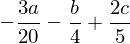

In [204]:
x_list = [-3, 1, 2]
y_list = symbols('a b c')
apply_finite_diff(1, x_list, y_list, 0)

## 8. Solvers

See the documentation -> http://docs.sympy.org/dev/tutorial/solvers.html

## 9. Matrices

See the documentation -> http://docs.sympy.org/dev/tutorial/matrices.html